In [1]:
import fairlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 140

In [2]:
bios_both_results = fairlib.analysis.retrive_results("Bios_both", log_dir=r"D:\Project\Dev_Fairness_NLP\analysis\results")

In [3]:
bios_both_results["AAdv"] = bios_both_results["BTGAdv"]

bios_both_all_df = fairlib.analysis.final_results_df(
    model_order=["INLP", "Adv", "DAdv", "AAdv"],
    results_dict = bios_both_results,
    pareto = True,
    pareto_selection = "test",
    selection_criterion = "DTO",
    return_dev = True,
    )

In [4]:
bios_both_all_df.keys()

Index(['Models', 'test_performance mean', 'test_performance std',
       'test_fairness mean', 'test_fairness std', 'dev_performance mean',
       'dev_performance std', 'dev_fairness mean', 'dev_fairness std', 'DTO',
       'is_pareto'],
      dtype='object')

In [5]:
((1-bios_both_all_df["dev_performance mean"])**2 + (1-bios_both_all_df["dev_fairness mean"])**2)**0.5

0    0.496844
1    0.413357
2    0.406590
3    0.394689
dtype: float64

In [6]:
bios_both_all_df.keys()

Index(['Models', 'test_performance mean', 'test_performance std',
       'test_fairness mean', 'test_fairness std', 'dev_performance mean',
       'dev_performance std', 'dev_fairness mean', 'dev_fairness std', 'DTO',
       'is_pareto'],
      dtype='object')

In [7]:
def exam_selection_criteria(
    selection_criterion = "DTO",
    Fairness_threshold = 0.0,
    Performance_threshold = 0.0
):

    _bios_both_df = fairlib.analysis.final_results_df(
        model_order=["INLP", "Adv", "DAdv", "AAdv"],
        results_dict = bios_both_results,
        pareto = True,
        pareto_selection = "test",
        selection_criterion = selection_criterion,
        Fairness_threshold = Fairness_threshold,
        Performance_threshold = Performance_threshold,
        return_dev = True,
        )
    _bios_both_df["Dev_DTO"] = ((1-_bios_both_df["dev_performance mean"])**2 + (1-_bios_both_df["dev_fairness mean"])**2)**0.5
    _bios_both_df = _bios_both_df*100
    _bios_both_df["Models"] = ["INLP", "Adv", "DAdv", "AAdv"]
    _bios_both_df = _bios_both_df.drop(columns=['is_pareto']).fillna(0)
    print(_bios_both_df.to_latex(index=False))
    return _bios_both_df

In [8]:
_ = exam_selection_criteria(selection_criterion = "DTO")

\begin{tabular}{lrrrrrrrrrr}
\toprule
Models &  test\_performance mean &  test\_performance std &  test\_fairness mean &  test\_fairness std &  dev\_performance mean &  dev\_performance std &  dev\_fairness mean &  dev\_fairness std &       DTO &   Dev\_DTO \\
\midrule
  INLP &              81.354350 &              0.000000 &           62.442580 &           0.000000 &             80.339540 &             0.000000 &          54.371000 &          0.000000 & 41.931134 & 49.684398 \\
   Adv &              64.601630 &              4.508314 &           83.683840 &           1.123115 &             63.862724 &             4.375978 &          79.931703 &          3.020925 & 38.977707 & 41.335690 \\
  DAdv &              68.089476 &              5.485370 &           79.471282 &           6.769568 &             67.579409 &             5.458177 &          75.463176 &          6.670896 & 37.943508 & 40.658953 \\
  AAdv &              69.734659 &              4.898247 &           78.820603 &         

In [9]:
_ = exam_selection_criteria(selection_criterion = "performance")

\begin{tabular}{lrrrrrrrrrr}
\toprule
Models &  test\_performance mean &  test\_performance std &  test\_fairness mean &  test\_fairness std &  dev\_performance mean &  dev\_performance std &  dev\_fairness mean &  dev\_fairness std &       DTO &   Dev\_DTO \\
\midrule
  INLP &              81.354350 &              0.000000 &           62.442580 &           0.000000 &             80.339540 &             0.000000 &          54.371000 &          0.000000 & 41.931134 & 49.684398 \\
   Adv &              81.470683 &              0.209556 &           59.474805 &           1.739385 &             80.730194 &             0.220989 &          55.199163 &          1.304193 & 44.560375 & 48.769257 \\
  DAdv &              81.436214 &              0.271583 &           59.287611 &           1.705075 &             80.627966 &             0.251841 &          54.852240 &          1.709069 & 44.744975 & 49.128362 \\
  AAdv &              81.256687 &              0.268492 &           58.635181 &         

In [10]:
_ = exam_selection_criteria(selection_criterion = "performance", Fairness_threshold=0.65)

\begin{tabular}{lrrrrrrrrrr}
\toprule
Models &  test\_performance mean &  test\_performance std &  test\_fairness mean &  test\_fairness std &  dev\_performance mean &  dev\_performance std &  dev\_fairness mean &  dev\_fairness std &       DTO &   Dev\_DTO \\
\midrule
  INLP &              53.753905 &              0.000000 &           74.979811 &           0.000000 &             53.833516 &             0.000000 &          74.423048 &          0.000000 & 52.580521 & 52.778071 \\
   Adv &              71.531363 &              5.669668 &           67.315544 &           5.354399 &             71.254107 &             5.824511 &          66.183372 &          4.202679 & 43.344399 & 44.383451 \\
  DAdv &              73.435065 &              3.763752 &           68.755527 &           4.905491 &             72.964586 &             3.681593 &          65.952841 &          3.685704 & 41.011131 & 43.475541 \\
  AAdv &              70.357258 &              5.722893 &           73.948014 &         

In [11]:
_ = exam_selection_criteria(selection_criterion = "performance", Fairness_threshold=0.70)

\begin{tabular}{lrrrrrrrrrr}
\toprule
Models &  test\_performance mean &  test\_performance std &  test\_fairness mean &  test\_fairness std &  dev\_performance mean &  dev\_performance std &  dev\_fairness mean &  dev\_fairness std &       DTO &   Dev\_DTO \\
\midrule
  INLP &              53.753905 &              0.000000 &           74.979811 &           0.000000 &             53.833516 &             0.000000 &          74.423048 &          0.000000 & 52.580521 & 52.778071 \\
   Adv &              68.815482 &              4.795215 &           72.103062 &           5.577901 &             68.152610 &             4.833248 &          70.271687 &          6.521562 & 41.841526 & 43.566373 \\
  DAdv &              69.660694 &              2.900897 &           73.240677 &           6.832685 &             69.207740 &             2.725972 &          70.604944 &          3.952069 & 40.454108 & 42.570325 \\
  AAdv &              70.006104 &              3.340678 &           75.032929 &         

In [12]:
_ = exam_selection_criteria(selection_criterion = "fairness", Performance_threshold=0.0)

\begin{tabular}{lrrrrrrrrrr}
\toprule
Models &  test\_performance mean &  test\_performance std &  test\_fairness mean &  test\_fairness std &  dev\_performance mean &  dev\_performance std &  dev\_fairness mean &  dev\_fairness std &       DTO &   Dev\_DTO \\
\midrule
  INLP &              29.812215 &              0.000000 &           99.999689 &           0.000000 &             29.864914 &             0.000000 &          86.636821 &          0.000000 & 70.187785 & 71.396812 \\
   Adv &              51.601020 &             16.540178 &           90.219145 &           9.262941 &             51.219423 &            16.237612 &          80.958107 &          6.000118 & 49.377388 & 52.365431 \\
  DAdv &              61.776597 &              3.693665 &           88.646096 &           3.685025 &             61.151880 &             3.520992 &          82.157103 &          2.510622 & 39.874048 & 42.749800 \\
  AAdv &              37.946932 &              9.084083 &           99.038855 &         

In [13]:
_ = exam_selection_criteria(selection_criterion = "fairness", Performance_threshold=(0.78))

\begin{tabular}{lrrrrrrrrrr}
\toprule
Models &  test\_performance mean &  test\_performance std &  test\_fairness mean &  test\_fairness std &  dev\_performance mean &  dev\_performance std &  dev\_fairness mean &  dev\_fairness std &       DTO &   Dev\_DTO \\
\midrule
  INLP &              81.354350 &              0.000000 &           62.442580 &           0.000000 &             80.339540 &             0.000000 &          54.371000 &          0.000000 & 41.931134 & 49.684398 \\
   Adv &              79.061434 &              1.052957 &           64.488537 &           1.304952 &             78.504929 &             0.873399 &          58.732196 &          2.424519 & 41.224841 & 46.530309 \\
  DAdv &              80.443072 &              0.522515 &           64.657701 &           1.406390 &             79.879518 &             0.545801 &          57.437202 &          1.137515 & 40.392468 & 47.078929 \\
  AAdv &              79.908082 &              2.177868 &           61.115353 &         

In [14]:
_ = exam_selection_criteria(selection_criterion = "fairness", Performance_threshold=(0.73))

\begin{tabular}{lrrrrrrrrrr}
\toprule
Models &  test\_performance mean &  test\_performance std &  test\_fairness mean &  test\_fairness std &  dev\_performance mean &  dev\_performance std &  dev\_fairness mean &  dev\_fairness std &       DTO &   Dev\_DTO \\
\midrule
  INLP &              81.354350 &              0.000000 &           62.442580 &           0.000000 &             80.339540 &             0.000000 &          54.371000 &          0.000000 & 41.931134 & 49.684398 \\
   Adv &              79.061434 &              1.052957 &           64.488537 &           1.304952 &             78.504929 &             0.873399 &          58.732196 &          2.424519 & 41.224841 & 46.530309 \\
  DAdv &              74.207748 &              3.152859 &           66.965168 &           2.367657 &             73.705732 &             3.284853 &          64.236675 &          1.143709 & 41.911101 & 44.389232 \\
  AAdv &              74.859790 &              5.121396 &           65.366052 &         

In [15]:
from fairlib.src.analysis.utils import auc_performance_fairness_tradeoff

In [16]:
bios_both_all_df = fairlib.analysis.final_results_df(
    model_order=["INLP", "Adv", "DAdv", "AAdv"],
    results_dict = bios_both_results,
    pareto = True,
    pareto_selection = "test",
    selection_criterion = None,
    return_dev = True,
    )

In [17]:
for _method in  ["INLP", "Adv", "DAdv", "AAdv"]:
    auc_score = auc_performance_fairness_tradeoff(
        bios_both_all_df[bios_both_all_df["Models"]==_method],
        random_performance = 0.3,
        )
    print(_method, auc_score[0])

INLP 0.3982569166553376
Adv 0.43572503606466517
DAdv 0.44499411533585953
AAdv 0.4400661978816351


In [18]:
bios_both_plot_df = fairlib.analysis.final_results_df(
    model_order=["INLP", "Adv", "DAdv", "AAdv"],
    results_dict = bios_both_results,
    pareto = True,
    pareto_selection = "test",
    selection_criterion = None,
    return_dev = True,
    )

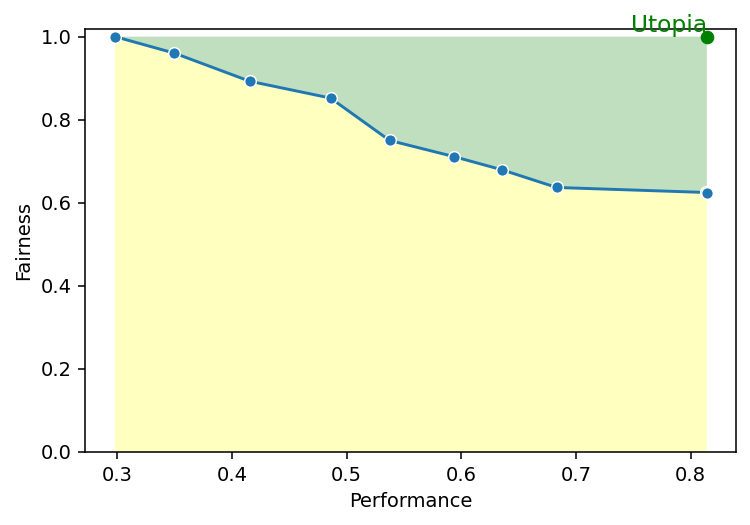

In [19]:
_pareto_df = bios_both_plot_df[bios_both_plot_df["Models"]=="INLP"]

image = sns.lineplot(
            data=_pareto_df,
            x="test_performance mean",
            y="test_fairness mean",
            hue="Models",
            markers=True,
            style="Models",
            legend=None
        )

_xlim = image.axes.get_xlim()
_ylim = image.axes.get_ylim()

_tmp_df = fairlib.src.analysis.utils.auc_performance_fairness_tradeoff(
    _pareto_df,
    random_performance = 0.3,
    # performance_threshold = 0.70, 
    # interpolation = "constant",
    interpolation = "linear",
    )[1]

plt.fill_between(_tmp_df["test_performance mean"], _tmp_df["test_fairness mean"], 1, facecolor='green', alpha=0.25)
plt.fill_between(_tmp_df["test_performance mean"], _tmp_df["test_fairness mean"], 0, facecolor='yellow', alpha=0.25)

max_fairness = max(_pareto_df["test_fairness mean"])
max_performance = max(_pareto_df["test_performance mean"])

plt.plot(max_performance, max_fairness, "go")
plt.text(max_performance, max_fairness, "Utopia", c="g",horizontalalignment='right',verticalalignment='bottom', fontsize=12)

plt.xlim(_xlim)
plt.ylim((0,_ylim[1]))

plt.xlabel("Performance")
plt.ylabel("Fairness")

plt.savefig('Bios_both_INLP_AUC.pdf', format="pdf", dpi=960, bbox_inches='tight')

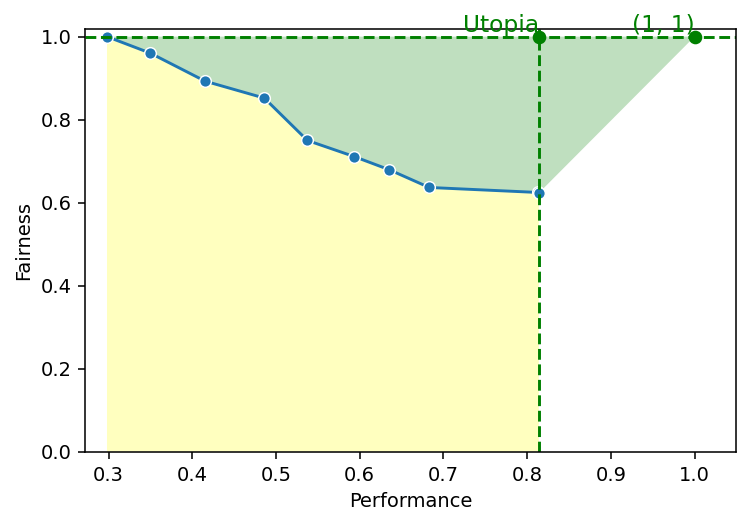

In [20]:
_pareto_df = bios_both_plot_df[bios_both_plot_df["Models"]=="INLP"]

image = sns.lineplot(
            data=_pareto_df,
            x="test_performance mean",
            y="test_fairness mean",
            hue="Models",
            markers=True,
            style="Models",
            legend=None
        )

_xlim = image.axes.get_xlim()
_ylim = image.axes.get_ylim()

_tmp_df = fairlib.src.analysis.utils.auc_performance_fairness_tradeoff(
    _pareto_df,
    random_performance = 0.3,
    # performance_threshold = 0.70, 
    # interpolation = "constant",
    interpolation = "linear",
    )[1]

plt.fill_between(list(_tmp_df["test_performance mean"])+[1], list(_tmp_df["test_fairness mean"])+[1], 1, facecolor='green', alpha=0.25)
plt.fill_between(_tmp_df["test_performance mean"], _tmp_df["test_fairness mean"], 0, facecolor='yellow', alpha=0.25)

max_fairness = max(_pareto_df["test_fairness mean"])
max_performance = max(_pareto_df["test_performance mean"])
plt.axvline(max_performance, ls="--", color='g') # vertical
plt.axhline(max_fairness, ls="--", color='g') # horizontal

plt.plot(max_performance, max_fairness, "go")
plt.text(max_performance, max_fairness, "Utopia", c="g",horizontalalignment='right',verticalalignment='bottom', fontsize=12)

plt.plot(1, 1, "go")
plt.text(1, 1, "(1, 1)", c="g",horizontalalignment='right',verticalalignment='bottom', fontsize=12)

# plt.xlim(_xlim)
plt.xlim((_xlim[0],1.05))
plt.ylim((0,_ylim[1]))

plt.xlabel("Performance")
plt.ylabel("Fairness")

plt.savefig('Bios_both_INLP_AUC_extra.pdf', format="pdf", dpi=960, bbox_inches='tight')

In [21]:
import numpy as np

p = np.array([0.5, 0.8])
f = np.array([1.0, 0.5])

In [22]:
((max(p)-p)**2 + (max(f)-f)**2)**0.5

array([0.3, 0.5])

In [23]:
((1-p)**2 + (1.1-f)**2)**0.5

array([0.50990195, 0.63245553])

In [54]:
import math
from fairlib.src.analysis.utils import l2norm

In [71]:
utopia_performance = 0.82
utopia_fairness = 1.0
s_DTO = 0.2
candidate_radians = [0, 30, 45, 60, 90]

fairness_distance = [s_DTO * math.sin(math.radians(i)) for i in candidate_radians]
performance_distance = [s_DTO * math.cos(math.radians(i)) for i in candidate_radians]

candidate_performance = np.array([utopia_performance - i for i in performance_distance])
candidate_fairness = np.array([utopia_fairness - i for i in fairness_distance])

# Reshape and concatnate
performacne_metric = candidate_performance.reshape(-1,1)
fairness_metric = candidate_fairness.reshape(-1,1)
normalized_metric = np.concatenate([performacne_metric, fairness_metric], axis=1)

utopia_optimum = np.ones_like(normalized_metric) * np.array([utopia_performance, utopia_fairness])
arbitrary_optimum = np.ones_like(normalized_metric) * np.array([1.0, 1.0])

DTO_utopia = l2norm(normalized_metric, utopia_optimum)
DTO_arbitrary = l2norm(normalized_metric, arbitrary_optimum)
DTO_delta = DTO_arbitrary - DTO_utopia

dto_example_df = pd.DataFrame({
    "candidate_radians":candidate_radians,
    "candidate_performance":candidate_performance,
    "candidate_fairness":candidate_fairness,
    "DTO_utopia":DTO_utopia,
    "DTO_arbitrary":DTO_arbitrary,
    "DTO_delta":DTO_delta,
})

dto_example_df

,candidate_radians,candidate_performance,candidate_fairness,DTO_utopia,DTO_arbitrary,DTO_delta
0,0,0.620000,1.000000,0.2,0.380000,0.180000
1,30,0.646795,0.900000,0.2,0.367088,0.167088
2,45,0.678579,0.858579,0.2,0.351158,0.151158
3,60,0.720000,0.826795,0.2,0.329242,0.129242
4,90,0.820000,0.800000,0.2,0.269072,0.069072


In [72]:
print((dto_example_df*100).round(1).to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 candidate\_radians &  candidate\_performance &  candidate\_fairness &  DTO\_utopia &  DTO\_arbitrary &  DTO\_delta \\
\midrule
                 0 &                   62.0 &               100.0 &        20.0 &           38.0 &       18.0 \\
              3000 &                   64.7 &                90.0 &        20.0 &           36.7 &       16.7 \\
              4500 &                   67.9 &                85.9 &        20.0 &           35.1 &       15.1 \\
              6000 &                   72.0 &                82.7 &        20.0 &           32.9 &       12.9 \\
              9000 &                   82.0 &                80.0 &        20.0 &           26.9 &        6.9 \\
\bottomrule
\end{tabular}

